# Retinal Degeneration Associated With RPGRIP1


Data from [Beryozkin A, et al. Retinal Degeneration Associated With RPGRIP1: A Review of Natural History, Mutation Spectrum, and Genotype-Phenotype Correlation in 228 Patients](https://pubmed.ncbi.nlm.nih.gov/34722527)

In [1]:
import genophenocorr

print(f"Using genophenocorr version {genophenocorr.__version__}")

Using genophenocorr version 0.1.1dev


## Setup

### Load HPO

We use HPO `v2023-10-09` release for this analysis.

In [2]:
import hpotk

store = hpotk.configure_ontology_store()

hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')

Loaded HPO v2023-10-09


### Load Phenopackets

We will load phenopackets from the *RPGRIP1* cohort of Phenopacket Store `0.1.18`.

### Load Phenopackets

We will load phenopacket JSON files located in `phenopackets` folder that is next to the notebook.

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from genophenocorr.preprocessing import configure_caching_cohort_creator, load_phenopackets

cohort_name = 'RPGRIP1'
phenopacket_store_release = '0.1.18'

cohort_creator = configure_caching_cohort_creator(hpo)

registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(cohort_name))
    cohort = load_phenopackets(
        phenopackets=phenopackets, 
        cohort_creator=cohort_creator,
    )

Patients Created: 100%|██████████| 229/229 [00:17<00:00, 13.25it/s]
Validated under none policy
No errors or warnings were found
Load phenopackets


### Pick transcript

We choose the [MANE Select](https://www.ncbi.nlm.nih.gov/nuccore/NM_020366.4) transcript for *RPGRIP1*.

In [4]:
tx_id = 'NM_020366.4'

## Explore cohort

Explore the cohort to guide selection of the genotype-phenotype analysis.


In [5]:
from IPython.display import display, HTML
from genophenocorr.view import CohortViewable

cv = CohortViewable(hpo=hpo)
html = cv.process(cohort=cohort, transcript_id=tx_id)

display(HTML(html))

HPO Term,ID,Annotation Count
Very low visual acuity,HP:0032122,89
Abnormal electroretinogram,HP:0000512,28
Eye poking,HP:0001483,28
Moderately reduced visual acuity,HP:0030515,24
Moderate hypermetropia,HP:0031729,12
Global developmental delay,HP:0001263,12
Constriction of peripheral visual field,HP:0001133,10
High hypermetropia,HP:0008499,9
Severely reduced visual acuity,HP:0001141,6
High myopia,HP:0011003,4


<Axes: title={'center': 'X-linked retinitis pigmentosa GTPase regulator-interacting protein 1\ntranscript: NM_020366.4, protein: NP_065099.3'}>

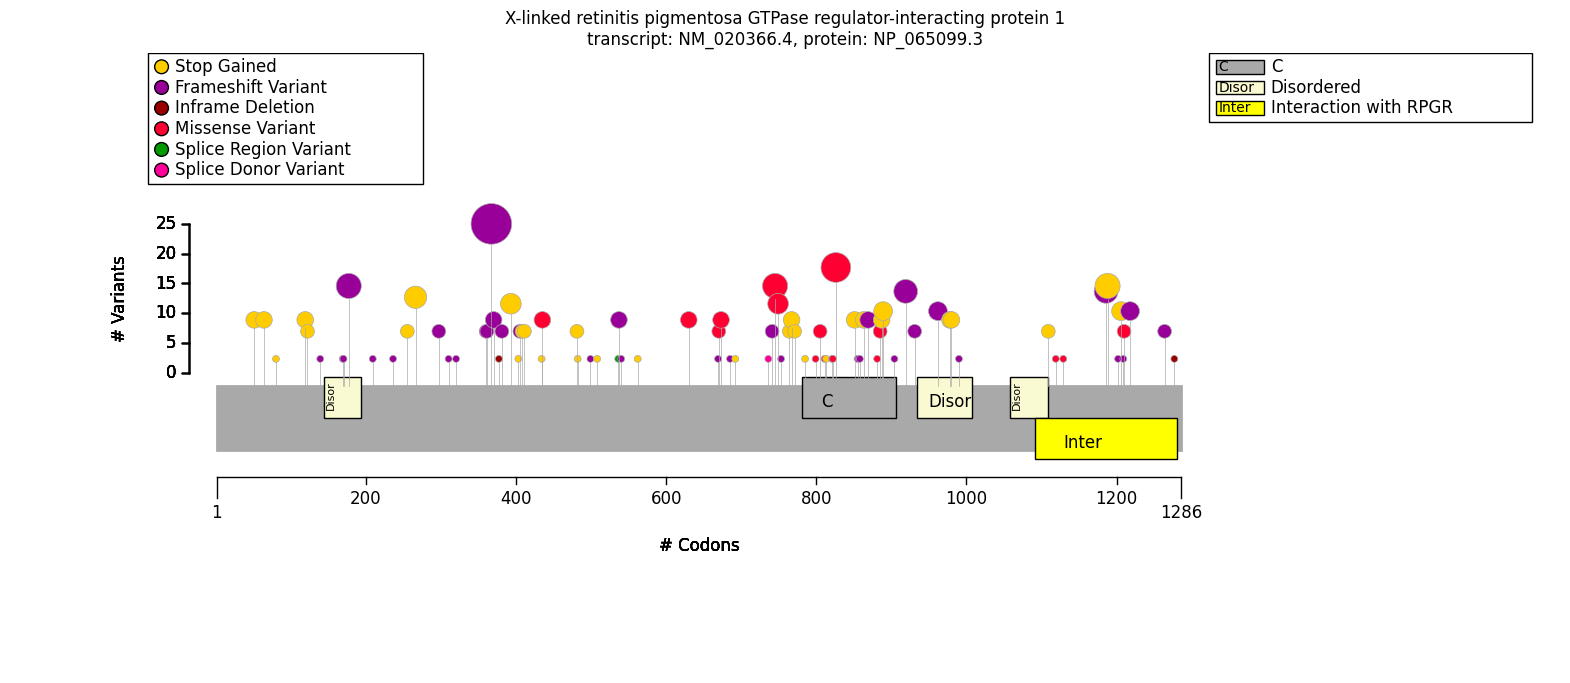

In [6]:
from genophenocorr.preprocessing import configure_protein_metadata_service
from genophenocorr.model.genome import GRCh38
from genophenocorr.preprocessing import VVMultiCoordinateService
from genophenocorr.view import ProteinVisualizable, ProteinVisualizer

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(tx_id)

pms = configure_protein_metadata_service()
protein_meta = pms.annotate('NP_065099.3')

pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis)

## Configure the analysis

In [7]:
from genophenocorr.analysis import configure_cohort_analysis, CohortAnalysisConfiguration

all_hpo_analysis = configure_cohort_analysis(cohort, hpo)

## Run the analyses

Test for presence of genotype-phenotype correlations between missense variants vs. others.

In [8]:
from genophenocorr.model import VariantEffect
from genophenocorr.analysis.predicate import PatientCategories
from genophenocorr.analysis.predicate.genotype import VariantPredicates

Test for presence of genotype-phenotype correlations between frameshift variants vs. others.

In [9]:
is_frameshift = VariantPredicates.variant_effect(VariantEffect.FRAMESHIFT_VARIANT, tx_id=tx_id)
by_frameshift = all_hpo_analysis.compare_hpo_vs_genotype(is_frameshift)
by_frameshift.summarize(hpo, PatientCategories.YES)

FRAMESHIFT_VARIANT on NM_020366.4                     Yes             No  \
                                                    Count Percent  Count   
Eye poking [HP:0001483]                             23/27     85%   5/12   
Abnormal visual electrophysiology [HP:0030453]      11/11    100%  16/16   
All [HP:0000001]                                    52/52    100%  69/69   
Sensory behavioral abnormality [HP:5200046]         23/23    100%    5/5   
Abnormality of vision [HP:0000504]                  48/48    100%  66/66   
Abnormality of refraction [HP:0000539]              16/16    100%  12/12   
High myopia [HP:0011003]                              4/4    100%    0/0   
Recurrent maladaptive behavior [HP:5200241]         23/23    100%    5/5   
Hypermetropia [HP:0000540]                          12/12    100%  12/12   
Moderately reduced visual acuity [HP:0030515]         8/8    100%  16/16   
Abnormal eye physiology [HP:0012373]                52/52    100%  67/67   
Abnormal nervous system physiology [HP:0012638]     27/27    100%    8/8   
Phenotypic abnormality [HP:0000118]                 52/52    100%  69/69   
Tactile sensory seeking [HP:5200065]                23/23    100%    5/5   
Reduced visual acuity [HP:0007663]                  48/48    100%  66/66   
Constriction of peripheral visual field [HP:000...    5/5    100%    5/5   
Visual field defect [HP:0001123]                      5/5    100%    5/5   
Atypical behavior [HP:0000708]                      23/23    100%    5/5   
Mildly reduced visual acuity [HP:0032037]             1/1    100%    2/2   
Visual impairment [HP:0000505]                      48/48    100%  66/66   
Abnormal movements of face and head [HP:5200017]    23/23    100%    5/5   
Abnormality of the eye [HP:0000478]                 52/52    100%  67/67   
Abnormal electroretinogram [HP:0000512]             11/11    100%  16/17   
High hypermetropia [HP:0008499]                       4/4    100%    5/5   
Very low visual acuity [HP:0032122]                 36/36    100%  45/45   
Moderate hypermetropia [HP:0031729]                   7/7    100%    5/5   
Abnormality of the nervous system [HP:0000707]      27/27    100%    8/8   
Mild hypermetropia [HP:0031728]                       1/1    100%    1/1   
Self-injurious behavior [HP:0100716]                23/23    100%    5/5   
Neurodevelopmental delay [HP:0012758]                 8/8    100%    3/3   
Restricted or repetitive behaviors or interests...  23/23    100%    5/5   
Abnormality of mental function [HP:0011446]         23/23    100%    5/5   
Neurodevelopmental abnormality [HP:0012759]           8/8    100%    3/3   
Abnormal repetitive mannerisms [HP:0000733]         23/23    100%    5/5   
Myopia [HP:0000545]                                   4/4    100%    0/0   
Sensory seeking [HP:4000079]                        23/23    100%    5/5   
Severely reduced visual acuity [HP:0001141]           3/3    100%    3/3   

FRAMESHIFT_VARIANT on NM_020366.4                                     \
                                                   Percent   p value   
Eye poking [HP:0001483]                                42%  0.016983   
Abnormal visual electrophysiology [HP:0030453]        100%  1.000000   
All [HP:0000001]                                      100%  1.000000   
Sensory behavioral abnormality [HP:5200046]           100%  1.000000   
Abnormality of vision [HP:0000504]                    100%  1.000000   
Abnormality of refraction [HP:0000539]                100%  1.000000   
High myopia [HP:0011003]                                0%  1.000000   
Recurrent maladaptive behavior [HP:5200241]           100%  1.000000   
Hypermetropia [HP:0000540]                            100%  1.000000   
Moderately reduced visual acuity [HP:0030515]         100%  1.000000   
Abnormal eye physiology [HP:0012373]                  100%  1.000000   
Abnormal nervous system physiology [HP:0012638]       100%  1.000000   
Phenotypic abnormality [HP:

Or between subjects with >=1 allele of a variant vs. the other subjects:

In [10]:
variant_key = '14_21312457_21312458_GA_G'
is_variant = VariantPredicates.variant_key(variant_key)

by_var = all_hpo_analysis.compare_hpo_vs_genotype(is_variant)
by_var.summarize(hpo, PatientCategories.YES)

variant has ID of 14_21312457_21312458_GA_G           Yes               No  \
                                                    Count Percent    Count   
Eye poking [HP:0001483]                             16/16    100%    12/23   
Abnormal visual electrophysiology [HP:0030453]        0/0      0%    27/27   
All [HP:0000001]                                    17/17    100%  104/104   
Sensory behavioral abnormality [HP:5200046]         16/16    100%    12/12   
Abnormality of vision [HP:0000504]                  17/17    100%    97/97   
Abnormality of refraction [HP:0000539]                3/3    100%    25/25   
High myopia [HP:0011003]                              0/0      0%      4/4   
Recurrent maladaptive behavior [HP:5200241]         16/16    100%    12/12   
Hypermetropia [HP:0000540]                            3/3    100%    21/21   
Moderately reduced visual acuity [HP:0030515]         0/0      0%    24/24   
Abnormal eye physiology [HP:0012373]                17/17    100%  102/102   
Abnormal nervous system physiology [HP:0012638]     16/16    100%    19/19   
Phenotypic abnormality [HP:0000118]                 17/17    100%  104/104   
Tactile sensory seeking [HP:5200065]                16/16    100%    12/12   
Reduced visual acuity [HP:0007663]                  17/17    100%    97/97   
Constriction of peripheral visual field [HP:000...    0/0      0%    10/10   
Visual field defect [HP:0001123]                      0/0      0%    10/10   
Atypical behavior [HP:0000708]                      16/16    100%    12/12   
Mildly reduced visual acuity [HP:0032037]             0/0      0%      3/3   
Visual impairment [HP:0000505]                      17/17    100%    97/97   
Abnormal movements of face and head [HP:5200017]    16/16    100%    12/12   
Abnormality of the eye [HP:0000478]                 17/17    100%  102/102   
Abnormal electroretinogram [HP:0000512]               0/0      0%    27/28   
High hypermetropia [HP:0008499]                       3/3    100%      6/6   
Very low visual acuity [HP:0032122]                 17/17    100%    64/64   
Moderate hypermetropia [HP:0031729]                   0/0      0%    12/12   
Abnormality of the nervous system [HP:0000707]      16/16    100%    19/19   
Mild hypermetropia [HP:0031728]                       0/0      0%      2/2   
Self-injurious behavior [HP:0100716]                16/16    100%    12/12   
Neurodevelopmental delay [HP:0012758]                 4/4    100%      7/7   
Restricted or repetitive behaviors or interests...  16/16    100%    12/12   
Abnormality of mental function [HP:0011446]         16/16    100%    12/12   
Neurodevelopmental abnormality [HP:0012759]           4/4    100%      7/7   
Abnormal repetitive mannerisms [HP:0000733]         16/16    100%    12/12   
Myopia [HP:0000545]                                   0/0      0%      4/4   
Sensory seeking [HP:4000079]                        16/16    100%    12/12   
Severely reduced visual acuity [HP:0001141]           0/0      0%      6/6   

variant has ID of 14_21312457_21312458_GA_G                           \
                                                   Percent   p value   
Eye poking [HP:0001483]                                52%  0.000919   
Abnormal visual electrophysiology [HP:0030453]        100%  1.000000   
All [HP:0000001]                                      100%  1.000000   
Sensory behavioral abnormality [HP:5200046]           100%  1.000000   
Abnormality of vision [HP:0000504]                    100%  1.000000   
Abnormality of refraction [HP:0000539]                100%  1.000000   
High myopia [HP:0011003]                              100%  1.000000   
Recurrent maladaptive behavior [HP:5200241]           100%  1.000000   
Hypermetropia [HP:0000540]                            100%  1.000000   
Moderately reduced visual acuity [HP:0030515]         100%  1.000000   
Abnormal eye physiology [HP:0012373]                  100%  1.000000   
Abnormal nervous syst

In [11]:
is_missense = VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id)
by_dis = all_hpo_analysis.compare_disease_vs_genotype(is_missense)
by_dis.summarize(hpo, PatientCategories.YES)

MISSENSE_VARIANT on NM_020366.4    Yes               No                    \
                                 Count Percent    Count Percent   p value   
OMIM:608194                      20/50     40%   17/170     10%  0.000004   
OMIM:613826                      30/50     60%  153/170     90%  0.000004   

MISSENSE_VARIANT on NM_020366.4                    
                                Corrected p value  
OMIM:608194                              0.000008  
OMIM:613826                              0.000008

In [12]:
analysis_config = CohortAnalysisConfiguration()
analysis_config.heuristic_strategy()
hpo_analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)


In [13]:
by_frameshift = hpo_analysis.compare_hpo_vs_genotype(is_frameshift)
by_frameshift.summarize(hpo, PatientCategories.YES)

FRAMESHIFT_VARIANT on NM_020366.4          Yes             No          \
                                         Count Percent  Count Percent   
Eye poking [HP:0001483]                  23/27     85%   5/12     42%   
Abnormal electroretinogram [HP:0000512]  11/11    100%  16/17     94%   

FRAMESHIFT_VARIANT on NM_020366.4                                    
                                          p value Corrected p value  
Eye poking [HP:0001483]                  0.016983          0.033966  
Abnormal electroretinogram [HP:0000512]  1.000000          1.000000

In [16]:
from genophenocorr.view import StatsViewer
viewer = StatsViewer()


display(HTML(viewer.process(by_frameshift.mtc_filter_report)))

Reason,Count
Skipping term because all genotypes have same HPO observed proportions,20
Skipping general term,8
Skipping term with only 4 observations (not powered for 2x2),2
Skipping term with only 2 observations (not powered for 2x2),1
Skipping term with only 6 observations (not powered for 2x2),1
Skipping term with only 3 observations (not powered for 2x2),1


In [17]:
by_var = all_hpo_analysis.compare_hpo_vs_recessive_genotype(is_variant)
by_var.summarize(hpo, PatientCategories.YES)

variant has ID of 14_21312457_21312458_GA_G          Both           One  \
                                                    Count Percent Count   
Eye poking [HP:0001483]                             16/16    100%   0/0   
Abnormal visual electrophysiology [HP:0030453]        0/0      0%   0/0   
All [HP:0000001]                                    17/17    100%   0/0   
Sensory behavioral abnormality [HP:5200046]         16/16    100%   0/0   
Abnormality of vision [HP:0000504]                  17/17    100%   0/0   
Abnormality of refraction [HP:0000539]                3/3    100%   0/0   
High myopia [HP:0011003]                              0/0      0%   0/0   
Recurrent maladaptive behavior [HP:5200241]         16/16    100%   0/0   
Hypermetropia [HP:0000540]                            3/3    100%   0/0   
Moderately reduced visual acuity [HP:0030515]         0/0      0%   0/0   
Abnormal eye physiology [HP:0012373]                17/17    100%   0/0   
Abnormal nervous system physiology [HP:0012638]     16/16    100%   0/0   
Phenotypic abnormality [HP:0000118]                 17/17    100%   0/0   
Tactile sensory seeking [HP:5200065]                16/16    100%   0/0   
Reduced visual acuity [HP:0007663]                  17/17    100%   0/0   
Constriction of peripheral visual field [HP:000...    0/0      0%   0/0   
Visual field defect [HP:0001123]                      0/0      0%   0/0   
Atypical behavior [HP:0000708]                      16/16    100%   0/0   
Mildly reduced visual acuity [HP:0032037]             0/0      0%   0/0   
Visual impairment [HP:0000505]                      17/17    100%   0/0   
Abnormal movements of face and head [HP:5200017]    16/16    100%   0/0   
Abnormality of the eye [HP:0000478]                 17/17    100%   0/0   
Abnormal electroretinogram [HP:0000512]               0/0      0%   0/0   
High hypermetropia [HP:0008499]                       3/3    100%   0/0   
Very low visual acuity [HP:0032122]                 17/17    100%   0/0   
Moderate hypermetropia [HP:0031729]                   0/0      0%   0/0   
Abnormality of the nervous system [HP:0000707]      16/16    100%   0/0   
Mild hypermetropia [HP:0031728]                       0/0      0%   0/0   
Self-injurious behavior [HP:0100716]                16/16    100%   0/0   
Neurodevelopmental delay [HP:0012758]                 4/4    100%   0/0   
Restricted or repetitive behaviors or interests...  16/16    100%   0/0   
Abnormality of mental function [HP:0011446]         16/16    100%   0/0   
Neurodevelopmental abnormality [HP:0012759]           4/4    100%   0/0   
Abnormal repetitive mannerisms [HP:0000733]         16/16    100%   0/0   
Myopia [HP:0000545]                                   0/0      0%   0/0   
Sensory seeking [HP:4000079]                        16/16    100%   0/0   
Severely reduced visual acuity [HP:0001141]           0/0      0%   0/0   

variant has ID of 14_21312457_21312458_GA_G                 Neither          \
                                                   Percent    Count Percent   
Eye poking [HP:0001483]                                 0%    12/23     52%   
Abnormal visual electrophysiology [HP:0030453]          0%    27/27    100%   
All [HP:0000001]                                        0%  104/104    100%   
Sensory behavioral abnormality [HP:5200046]             0%    12/12    100%   
Abnormality of vision [HP:0000504]                      0%    97/97    100%   
Abnormality of refraction [HP:0000539]                  0%    25/25    100%   
High myopia [HP:0011003]                                0%      4/4    100%   
Recurrent maladaptive behavior [HP:5200241]             0%    12/12    100%   
Hypermetropia [HP:0000540]                              0%    21/21    100%   
Moderately reduced visual acuity [HP:0030515]           0%    24/24    100%   
Abnormal eye physiology [HP:0012373]                    0%  102/102    100%   
Abnormal nervous system physiology [HP:0012638]

*-* EOF *-*